<a href="https://colab.research.google.com/github/rafiff18/Machine-Learning-Ti-2b/blob/main/js9_Deep_Computer_Vision_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Muhammad Rafif Pasya (4.33.23.1.18)**

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical

In [24]:
# 1. Load data
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

In [25]:
train_df.head(10)

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [26]:
# 2. Pisahkan fitur dan label
X = train_df.drop('label', axis=1).values
y = train_df['label'].values
X_test = test_df.values

In [27]:
# 3. Normalisasi dan reshape
X = X / 255.0
X_test = X_test / 255.0
X = X.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)


In [28]:
# 4. One-hot encoding label
y = to_categorical(y, num_classes=10)

In [29]:
# 5. Split data latih dan validasi
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.1, random_state=42)


In [30]:
# 6. Augmentasi data
datagen = ImageDataGenerator(
    rotation_range=10,
    zoom_range=0.1,
    width_shift_range=0.1,
    height_shift_range=0.1
)
datagen.fit(X_train)

In [31]:
# 7. Bangun arsitektur CNN
def build_cnn_model():
    model = keras.models.Sequential([
        keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(28, 28, 1)),
        keras.layers.BatchNormalization(),
        keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
        keras.layers.BatchNormalization(),
        keras.layers.MaxPooling2D((2, 2)),
        keras.layers.Dropout(0.25),

        keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
        keras.layers.BatchNormalization(),
        keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
        keras.layers.BatchNormalization(),
        keras.layers.MaxPooling2D((2, 2)),
        keras.layers.Dropout(0.25),

        keras.layers.Flatten(),
        keras.layers.Dense(128, activation='relu'),
        keras.layers.BatchNormalization(),
        keras.layers.Dropout(0.5),
        keras.layers.Dense(10, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

model = build_cnn_model()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [32]:
# 8. Callback
early_stop = keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=3, restore_best_weights=True)


In [33]:
# 9. Latih model (epoch singkat: 10)
history = model.fit(
    datagen.flow(X_train, y_train, batch_size=64),
    epochs=10,
    validation_data=(X_valid, y_valid),
    callbacks=[early_stop],
    verbose=1
)

Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


591/591 ━━━━━━━━━━━━━━━━━━━━ 194s 318ms/step - accuracy: 0.7605 - loss: 0.7797 - val_accuracy: 0.9660 - val_loss: 0.1144
Epoch 2/10
591/591 ━━━━━━━━━━━━━━━━━━━━ 186s 315ms/step - accuracy: 0.9569 - loss: 0.1436 - val_accuracy: 0.9867 - val_loss: 0.0448
Epoch 3/10
591/591 ━━━━━━━━━━━━━━━━━━━━ 185s 313ms/step - accuracy: 0.9680 - loss: 0.1051 - val_accuracy: 0.9881 - val_loss: 0.0336
Epoch 4/10
591/591 ━━━━━━━━━━━━━━━━━━━━ 198s 307ms/step - accuracy: 0.9746 - loss: 0.0851 - val_accuracy: 0.9900 - val_loss: 0.0332
Epoch 5/10
591/591 ━━━━━━━━━━━━━━━━━━━━ 184s 312ms/step - accuracy: 0.9766 - loss: 0.0773 - val_accuracy: 0.9869 - val_loss: 0.0376
Epoch 6/10
591/591 ━━━━━━━━━━━━━━━━━━━━ 183s 310ms/step - accuracy: 0.9803 - loss: 0.0657 - val_accuracy: 0.9912 - val_loss: 0.0324
Epoch 7/10
591/591 ━━━━━━━━━━━━━━━━━━━━ 183s 309ms/step - accuracy: 0.9816 - loss: 0.0610 - val_accuracy: 0.9881 - val_loss: 0.0358
Epoch 8/10
591/591 ━━━━━━━━━━━━━━━━━━━━ 182s 308ms/step - accuracy: 0.9804 - loss: 0.06

In [34]:
# 10. Evaluasi
val_loss, val_acc = model.evaluate(X_valid, y_valid, verbose=0)
print(f'Akurasi Validasi: {val_acc * 100:.2f}%')

Akurasi Validasi: 99.19%


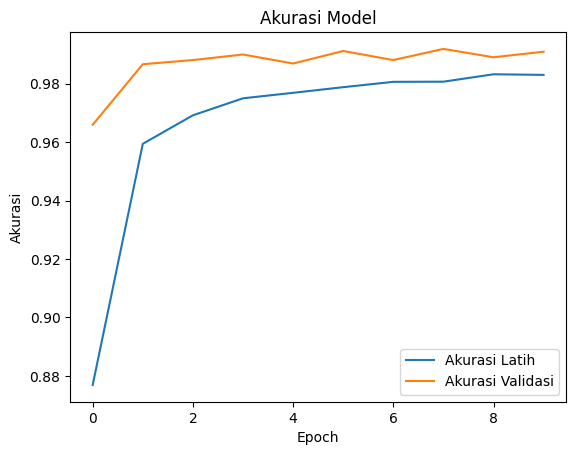

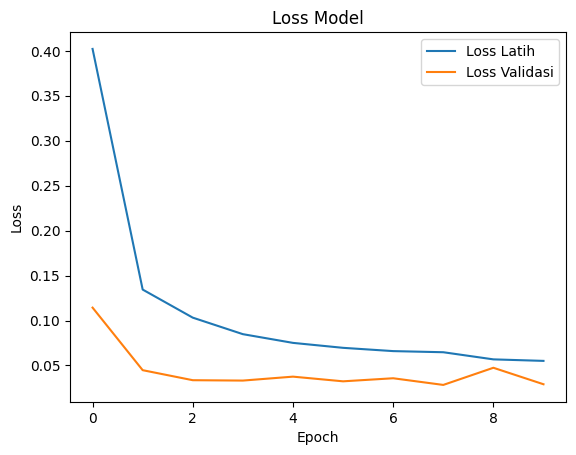

In [35]:
# 11. Visualisasi akurasi & loss
plt.plot(history.history['accuracy'], label='Akurasi Latih')
plt.plot(history.history['val_accuracy'], label='Akurasi Validasi')
plt.legend()
plt.title('Akurasi Model')
plt.xlabel('Epoch')
plt.ylabel('Akurasi')
plt.show()

plt.plot(history.history['loss'], label='Loss Latih')
plt.plot(history.history['val_loss'], label='Loss Validasi')
plt.legend()
plt.title('Loss Model')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

In [36]:
# 12. Prediksi pada data test
predictions = model.predict(X_test)
predicted_labels = np.argmax(predictions, axis=1)

875/875 ━━━━━━━━━━━━━━━━━━━━ 30s 34ms/step


In [37]:
# 13. Simpan hasil prediksi ke CSV
submission = pd.DataFrame({
    'ImageId': np.arange(1, len(predicted_labels) + 1),
    'Label': predicted_labels
})
submission.to_csv('submission.csv', index=False)
print("File submission.csv berhasil disimpan.")

File submission.csv berhasil disimpan.


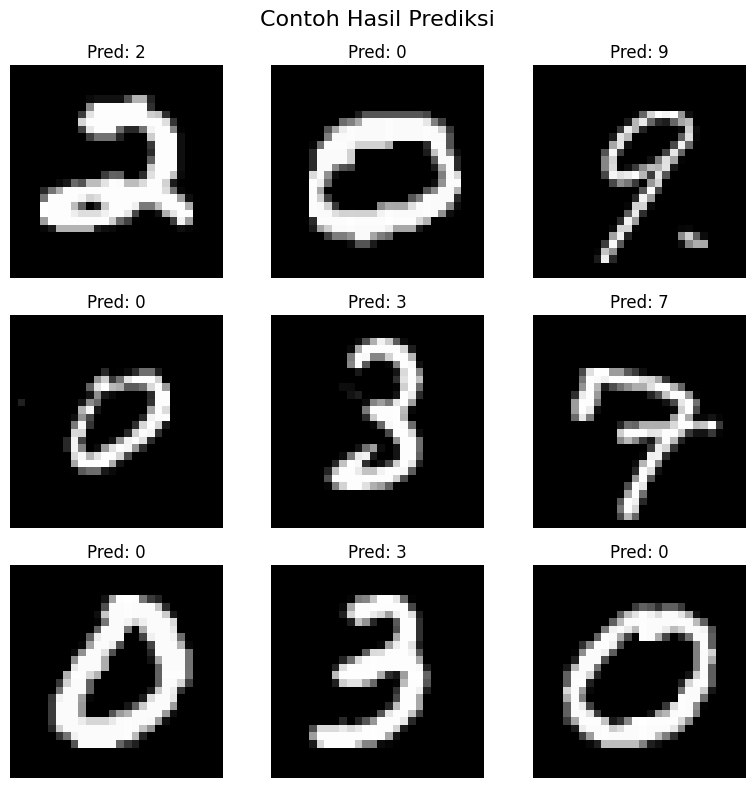

In [38]:
# 14. Tampilkan hasil prediksi pada 9 gambar
plt.figure(figsize=(8, 8))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(X_test[i].reshape(28, 28), cmap='gray')
    plt.title(f"Pred: {predicted_labels[i]}")
    plt.axis('off')
plt.suptitle("Contoh Hasil Prediksi", fontsize=16)
plt.tight_layout()
plt.show()